# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# Read the sba_loans.csv file from the Resources folder into a Pandas DataFrame
df_lending = pd.read_csv(
    Path('../data/lending_data.csv')
)

# Review the DataFrame
rows = 5
display(df_lending.head(rows))
display(df_lending.tail(rows))


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


In [3]:
# Review Summary Statistics
display(df_lending.describe())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending['loan_status']

# Separate the X variable, the features
X = df_lending.drop(columns=['loan_status'])


In [5]:
# Review the y variable Series
y.head()


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [6]:
# Review the X variable DataFrame
X.head()


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
y.value_counts()


0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [9]:
# Explore the train-test dataframes
# Training Data
print(f'The shape of the X_train dataframe is: {X_train.shape}')
print(f'The shape of the y_train dataframe is: {y_train.shape}')
print(f'The balance of of the y_train dataframe is: \n{y_train.value_counts()}\n')

# Testing Data
print(f'The shape of the X_test dataframe is: {X_test.shape}')
print(f'The shape of the y_test dataframe is: {y_test.shape}')
print(f'The balance of of the y_test dataframe is: \n{y_test.value_counts()}')


The shape of the X_train dataframe is: (58152, 7)
The shape of the y_train dataframe is: (58152,)
The balance of of the y_train dataframe is: 
0    56271
1     1881
Name: loan_status, dtype: int64

The shape of the X_test dataframe is: (19384, 7)
The shape of the y_test dataframe is: (19384,)
The balance of of the y_test dataframe is: 
0    18765
1      619
Name: loan_status, dtype: int64


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [10]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [11]:
# Make a prediction using the training data
training_predictions = classifier.predict(X_train)
pd.DataFrame({"Prediction": training_predictions, "Actual": y_train})


,Prediction,Actual
29175,0,0
23020,0,0
31269,0,0
35479,0,0
13470,0,0
...,...,...
20609,0,0
21440,0,0
73349,0,0
50057,0,0


In [12]:
# Make a prediction using the testing data
testing_predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": testing_predictions, "Actual": y_test})


,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [13]:
# Print the balanced_accuracy score of the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [14]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, testing_predictions)

print(f'Resampled Training Data: \n{confusion_matrix(y_train, training_predictions)}')
print(f'Resampled Test Data: \n{confusion_matrix(y_test, testing_predictions)}')


Resampled Training Data: 
[[55994   277]
 [  181  1700]]
Resampled Test Data: 
[[18663   102]
 [   56   563]]


Text(61.25, 0.5, 'Actual')

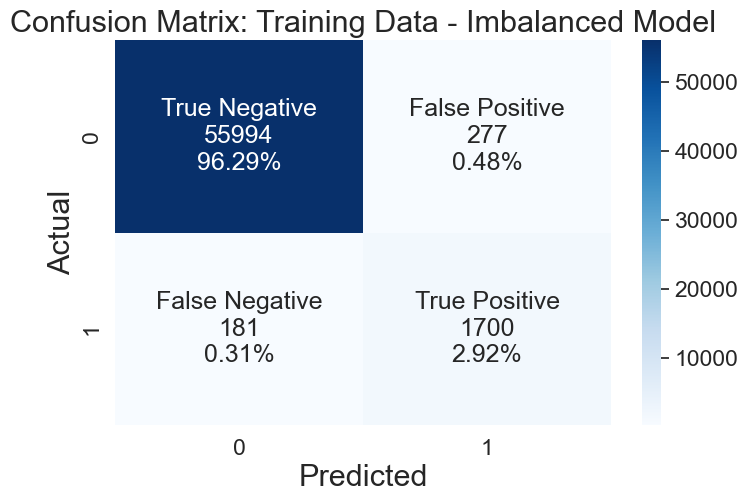

In [15]:
# Visualize Confusion Matrix as a Heatmap

# Set Confusion Matrix variable
cf_matrix = confusion_matrix(y_train, training_predictions)

# Print cf as a heat map
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1.5)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues') #, title = 'Confusion Matrix: Imbalanced Training Data')

plt.title('Confusion Matrix: Training Data - Imbalanced Model',fontsize=22)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

# Referance: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# Referance: https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3

Text(61.25, 0.5, 'Actual')

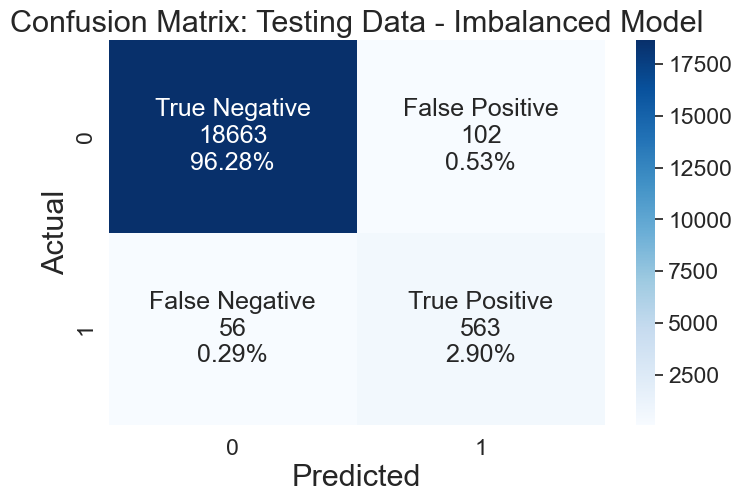

In [16]:
# Visualize Confusion Matrix as a Heatmap

# Set Confusion Matrix variable
cf_matrix = confusion_matrix(y_test, testing_predictions)

# Print cf as a heat map
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1.5)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues') #, title = 'Confusion Matrix: Imbalanced Training Data')

plt.title('Confusion Matrix: Testing Data - Imbalanced Model',fontsize=22)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

# Referance: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# Referance: https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3

In [17]:
# Print the classification report for the model
# Create and save the training classifiction report
training_report = classification_report_imbalanced(y_train, training_predictions)
testing_report = classification_report_imbalanced(y_test, testing_predictions)

# Print the training classification report
print(f'\033[1mClassification Report: Training Data in Imbalanced Model\033[0m \n{training_report}')
print('\n')
print(f'\033[1mClassification Report: Testing Data in Imbalanced Model\033[0m \n{testing_report}')


Classification Report: Training Data in Imbalanced Model 
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.90      1.00      0.95      0.91     56271
          1       0.86      0.90      1.00      0.88      0.95      0.89      1881

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     58152



Classification Report: Testing Data in Imbalanced Model 
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.91      1.00      0.95      0.91     18765
          1       0.85      0.91      0.99      0.88      0.95      0.90       619

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



In [18]:
# Calculate Error Rates - False Positives/Negatives
print(f'High Risk - False Positive Rate: {1-(563/619)}')
print(f'Low Risk - False Negative Rate: {1-(18663/18765)}')


High Risk - False Positive Rate: 0.0904684975767367
Low Risk - False Negative Rate: 0.005435651478816972


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model performs equally well on both the training and test data, this is good. Of greatest concern is rating a high risk loan as low risk which happens 56/619 or 9.0%. The opertunity cost of rating a low risk loan as high risk is very low at 102/1876 or 0.5%

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [19]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)


In [20]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()


0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [21]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_resampled = LogisticRegression(solver='lbfgs', random_state=1)
classifier_resampled


# Fit the model using the resampled training data
classifier_resampled.fit(X_resampled, y_resampled)


LogisticRegression(random_state=1)

In [22]:
# Make a prediction using the testing data
y_training_resampled_predictions = classifier_resampled.predict(X_resampled)
pd.DataFrame({"Prediction": y_training_resampled_predictions, "Actual": y_resampled})


,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
112537,1,1
112538,1,1
112539,1,1
112540,1,1


In [23]:
# Make a prediction using the testing data
y_test_pred_resampled = classifier_resampled.predict(X_test)
pd.DataFrame({"Prediction": y_test_pred_resampled, "Actual": y_test})


,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [24]:
# Print the balanced_accuracy score of the model 
print(f"Training Data Score: {classifier_resampled.score(X_resampled, y_resampled)}")
print(f"Testing Data Score: {classifier_resampled.score(X_test, y_test)}")


Training Data Score: 0.9947308560359688
Testing Data Score: 0.9938093272802311


In [25]:
# Generate a confusion matrix for the model
print(f'Resampled Training Data: \n{confusion_matrix(y_training_resampled_predictions, y_resampled)}')
print(f'Resampled Test Data: \n{confusion_matrix(y_test, y_test_pred_resampled)}')

Resampled Training Data: 
[[55964   286]
 [  307 55985]]
Resampled Test Data: 
[[18649   116]
 [    4   615]]


Text(61.25, 0.5, 'Actual')

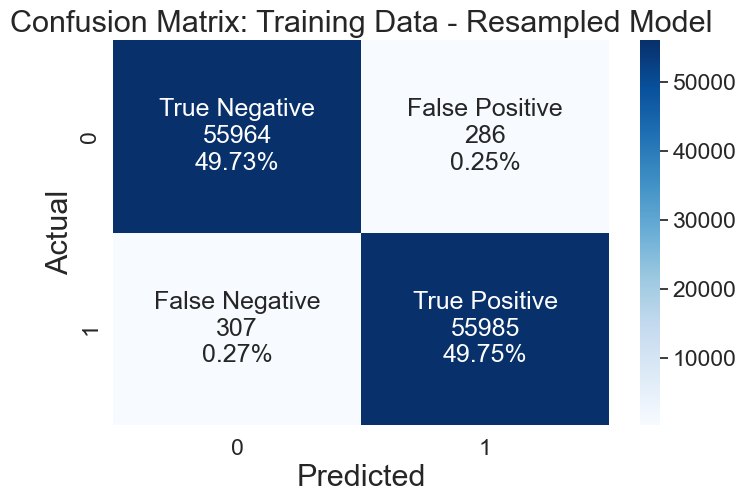

In [26]:
# Visualize Confusion Matrix as a Heatmap

# Set Confusion Matrix variable
cf_matrix = confusion_matrix(y_training_resampled_predictions, y_resampled)

# Print cf as a heat map
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1.5)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues') #, title = 'Confusion Matrix: Imbalanced Training Data')

plt.title('Confusion Matrix: Training Data - Resampled Model',fontsize=22)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

# Referance: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# Referance: https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3

Text(61.25, 0.5, 'Actual')

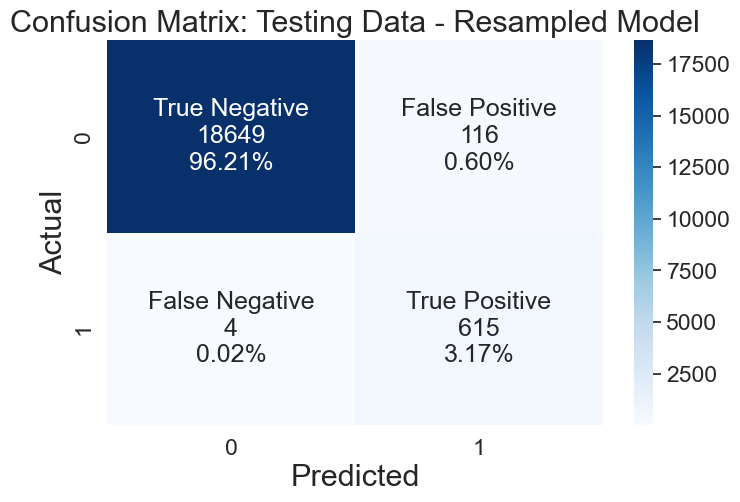

In [27]:
# Visualize Confusion Matrix as a Heatmap

# Set Confusion Matrix variable
cf_matrix = confusion_matrix(y_test, y_test_pred_resampled)

# Print cf as a heat map
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1.5)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues') #, title = 'Confusion Matrix: Imbalanced Training Data')

plt.title('Confusion Matrix: Testing Data - Resampled Model',fontsize=22)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

# Referance: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# Referance: https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3

In [28]:
# Print the classification report for the model
# Create and save the training classifiction report
training_report = classification_report_imbalanced(y_resampled, y_training_resampled_predictions)
testing_report = classification_report_imbalanced(y_test, y_test_pred_resampled)

# Print the training classification report
print(f'\033[1mClassification Report: Training Data in Resampled Model\033[0m \n{training_report}')
print('\n')
print(f'\033[1mClassification Report: Testing Data in Resampled Model\033[0m \n{testing_report}')



Classification Report: Training Data in Resampled Model 
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.99      0.99      0.99      0.99     56271
          1       0.99      0.99      0.99      0.99      0.99      0.99     56271

avg / total       0.99      0.99      0.99      0.99      0.99      0.99    112542



Classification Report: Testing Data in Resampled Model 
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.99      1.00      0.99      0.99     18765
          1       0.84      0.99      0.99      0.91      0.99      0.99       619

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



In [29]:
# Calculate Error Rates - False Positives/Negatives
print(f'High Risk - False Positive Rate: {1-(615/619)}')
print(f'Low Risk - False Negative Rate: {1-(18649/18765)}')


High Risk - False Positive Rate: 0.00646203554119551
Low Risk - False Negative Rate: 0.0061817212896350116


### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model performs equally well on both the training and test data, this is good. Of greatest concern is rating a high risk loan as low risk which happens 4/619 or 0.6%. The opertunity cost of rating a low risk loan as high risk is very low at 116/1876 or 0.6%. The oversampeled model performs much better decreasing false positives by 52 (from 56 to 4) at the small expense of increasing false negatives by 14 (from 102 to 116).